### Operasi pixel dan histogram

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [60]:
img = cv2.imread("image/img_gray.jpg")

In [61]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [62]:
[baris,kolom] = img.shape[:2]

In [63]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

#### Histogram

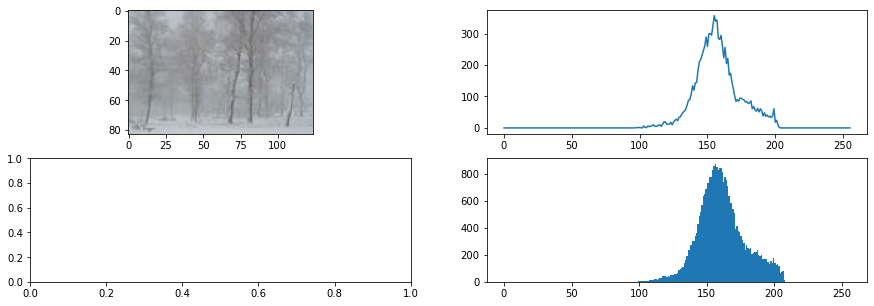

In [64]:
fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].plot(hist)
axs[1,1].hist(img.ravel(),256,[0,256])
plt.show()

#### Meningkatkan kecerahan

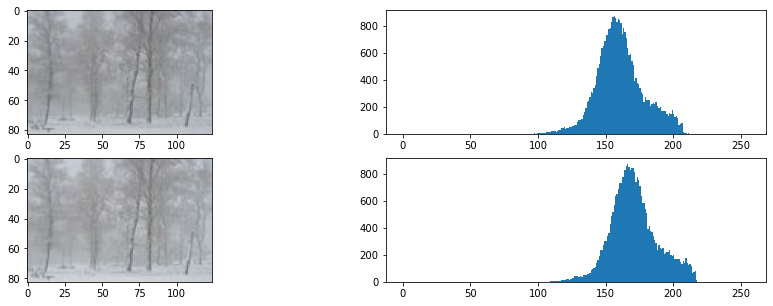

In [65]:
# 𝑔 𝑦, 𝑥 = 𝑓 𝑦, 𝑥 + 𝛽 
beta = 10
citra_cerah = np.zeros((baris,kolom,3))
for x in range(baris) :
    for y in range(kolom) :
        fxy = img[x,y] + beta
        citra_cerah[x,y] = fxy
citra_cerah = citra_cerah.astype(np.uint8)
fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(),256,[0,256])
plt.show()

#### Meregangkan kontras

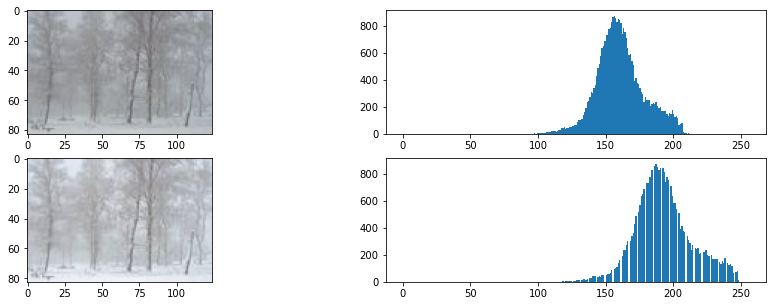

In [66]:
alpa = 1.2
citra_kontras = np.zeros((baris,kolom,3))
for x in range(baris) :
    for y in range(kolom) :
        fyx = img[x,y] * alpa
        citra_kontras[x,y] = fyx
citra_kontras = citra_kontras.astype(np.uint8)      
fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_kontras)
axs[1,1].hist(citra_kontras.ravel(),256,[0,256])
plt.show()

#### Kombinasi kecerahan dan kontras

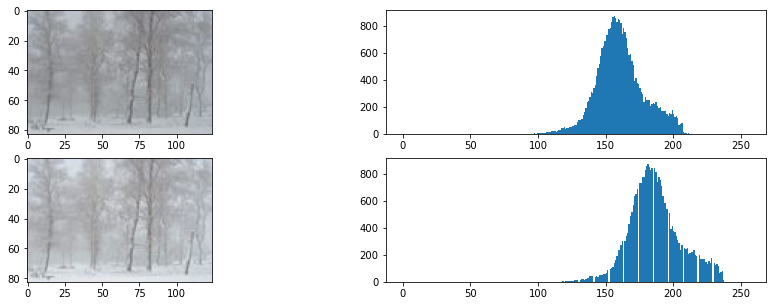

In [67]:
alpa = 1.1
beta = 10
img_hasil = np.zeros((baris,kolom,3))
for x in range(baris) :
    for y in range(kolom) :
        fyx = alpa * img[x,y] + beta
        img_hasil[x,y] = fyx

img_hasil = img_hasil.astype(np.uint8)
fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(img_hasil)
axs[1,1].hist(img_hasil.ravel(),256,[0,256])
plt.show()

#### Membalik citra

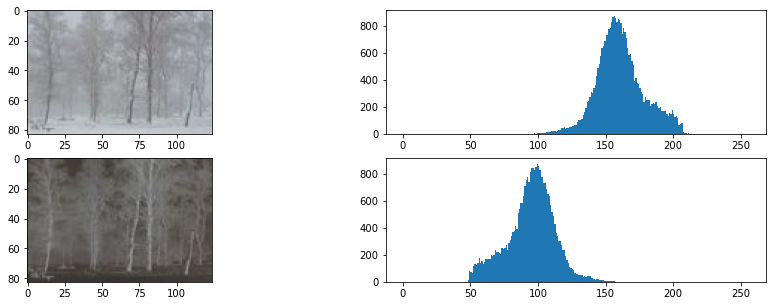

In [68]:
alpa = 1.2
beta = 10
citra_negatif = np.zeros((baris,kolom,3))
for x in range(baris) :
    for y in range(kolom) :
        fyx = 255 - img[x,y]
        citra_negatif[x,y] = fyx

citra_negatif = citra_negatif.astype(np.uint8)
fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_negatif)
axs[1,1].hist(citra_negatif.ravel(),256,[0,256])
plt.show()

#### Memotong aras keabuan

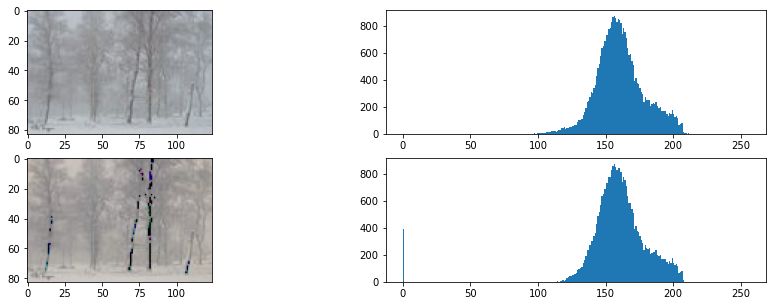

In [69]:
f1 = 120
f2 = 220
citra_keabuan = cv2.imread("image/img_gray.jpg")
for x in range(baris) :
    for y in range(kolom) :
        fyx = img[x,y]
        for z in range(3) : 
            if fyx[z] <= f1 :
                citra_keabuan[x,y][z] = 0
            elif fyx[z] >= f2 :
                citra_keabuan[x,y][z] = 255

citra_keabuan = citra_keabuan.astype(np.uint8)
fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].imshow(img)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_keabuan)
axs[1,1].hist(citra_keabuan.ravel(),256,[0,256])
plt.show()

#### Ekualisasi histogram

In [70]:
img_gray = cv2.imread("image/img_gray.jpg",0)
equ = cv2.equalizeHist(img_gray)
res = np.hstack((img_gray,equ))

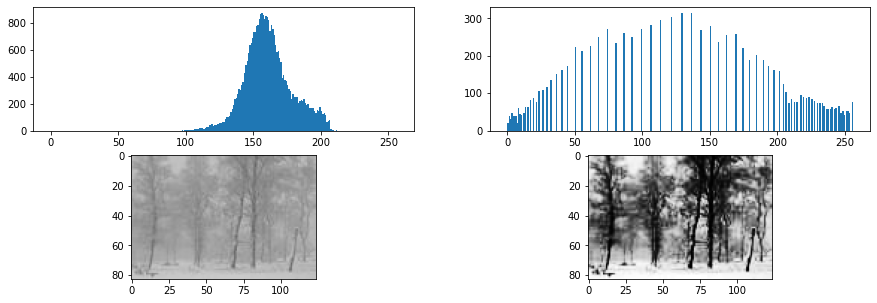

In [71]:
fig, axs = plt.subplots(2,2,figsize=(15,5))
axs[0,0].hist(img.ravel(),256,[0,256])
axs[0,1].hist(equ.ravel(),256,[0,256])
axs[1,0].imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
axs[1,1].imshow(cv2.cvtColor(equ, cv2.COLOR_BGR2RGB))
plt.show()